In [30]:
import torch
import torchvision
import yaml
import numpy as np
from data_loder import DataLoder
from model import VGG16

In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = VGG16().to(device)

In [32]:
saved_model = "./model/2023-04-19 17:38:27.989040"
model.load_state_dict(torch.load(saved_model))
model.eval()

VGG16(
  (_model): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [33]:
def test(model,dataLoder):
  correct = 0
  total = 0
  model.eval()
  with torch.no_grad():
    for image,label in dataLoder:        
      x = image.to(device)
      _y = label.to(device)

      output = model.forward(x)
      _,output_index = torch.max(output,1)

      total += label.size(0)
      correct += (output_index == _y).sum().float()
    acc = 100*correct/total
  return acc

In [34]:
with open("./config/cat_dog.yaml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
    print(config)

{'data': {'dataset': 'cats_and_dogs_filtered', 'root': '/media/cjh/hard_2tb/Data', 'train': 'train', 'test': 'validation', 'type': 'jpg', 'size': '244x244'}, 'param': {'batch_size': 32, 'learning_rate': 1e-05, 'epoch': 100}, 'save': {'path': './model'}}


In [35]:
loader = DataLoder()
loader.config = config
loader.load
test_set = loader.getTestData

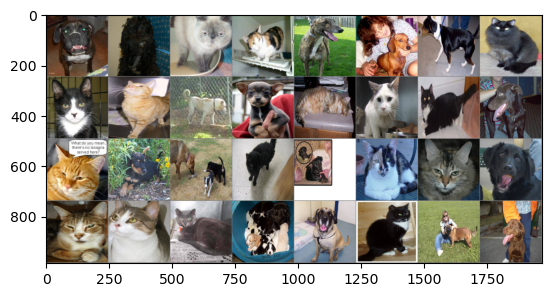

In [36]:
dataiter = iter(test_set)
images, labels = dataiter.next()

images = torchvision.utils.make_grid(images)
images = images /2 + 0.5
images = images.numpy()

import matplotlib.pyplot as plt
plt.imshow(np.transpose(images,(1,2,0)))
plt.show()


In [37]:
acc = test(model,test_set)
print("Accuracy of Test Data: {}%".format(acc))

Accuracy of Test Data: 79.80000305175781%
